# Importation des librairies

In [165]:
import pandas as pnd

### Lecture du fichier

In [166]:
observations = pnd.read_csv("datas/sonar.all-data.csv", header=None)

In [167]:
observations.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Nombre de colonnes du fichier

In [168]:
print("Nbr colonnes: ",len(observations.columns))

Nbr colonnes:  61


### Données du sonar - pour l'apprentissage

In [169]:
X = observations[observations.columns[0:60]].values
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

### Récupération des libellés

In [170]:
y = observations[observations.columns[60]]
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

### Import du LabelEncoder

In [171]:
from sklearn.preprocessing import LabelEncoder

### On encode : Les mines sont égales à 0 et les rochers égaux à 1

In [172]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [173]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### On ajoute un encodage pour créer des classes, si c'est une mine [1,0], si c'est un rocher [0,1]

In [174]:
import numpy as np

In [175]:
n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels,n_unique_labels))
one_hot_encode[np.arange(n_labels),y] = 1
Y=one_hot_encode

In [176]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

### Verification en prenant les enregistrement 0 et 97

In [177]:
print("Classe Rocher:",int(Y[0][1]))

Classe Rocher: 1


In [178]:
print("Classe Mine:",int(Y[97][1]))

Classe Mine: 0


### CREATION DES JEUX D'APPRENTISSAGE ET DE TEST

### On mélange

In [179]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=1)

In [180]:
# Creation des jeux d'apprentissage

In [181]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=42)

In [182]:
# PARAMETRAGE DU RESEAU DE  NEURONES

In [183]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [184]:
epochs = 600
nombre_neurones_entree = 60
nombre_neurones_sortie = 2
taux_apprentissage = 0.01

In [185]:
#Variable TensorFLow correspondant aux 60 valeurs des neurones d'entrée

In [186]:
tf_neurones_entrees_X = tf.placeholder(tf.float32,[None, 60])

In [187]:
#Variable TensorFlow correspondant au 2 neurones de sortie

In [188]:
tf_valeurs_reelles_Y = tf.placeholder(tf.float32,[None, 2])

In [189]:
poids = {
    # 60 neurones d'entrées vers 24 Neurones de la couche cachée
    'couche_entree_vers_cachee': tf.Variable(tf.random_normal([60, 31]), tf.float32),

    # 24 neurones de la couche cachée vers 2 de la couche de sortie
    'couche_cachee_vers_sortie': tf.Variable(tf.random_normal([31, 2]), tf.float32),
}

In [190]:
poids_biais = {
     #1 biais de la couche d'entrée vers les 24 neurones de la couche cachée
    'poids_biais_couche_entree_vers_cachee': tf.Variable(tf.zeros([31]), tf.float32),

    #1 biais de la couche cachée vers les 2 neurones de la couche de sortie
    'poids_biais_couche_cachee_vers_sortie': tf.Variable(tf.zeros([2]), tf.float32),
}

### FONCTION DE  CREATION DU RESEAU DE NEURONES

In [191]:
def reseau_neurones_multicouches(observations_en_entrees, poids, poids_biais):

    #Calcul de l'activation de la première couche
    premiere_activation = tf.sigmoid(tf.matmul(tf_neurones_entrees_X, poids['couche_entree_vers_cachee']) + poids_biais['poids_biais_couche_entree_vers_cachee'])

    #Calcul de l'activation de la seconde couche
    activation_couche_cachee = tf.sigmoid(tf.matmul(premiere_activation, poids['couche_cachee_vers_sortie']) + poids_biais['poids_biais_couche_cachee_vers_sortie'])

    return activation_couche_cachee

### CREATION DU RESEAU DE NEURONES

In [192]:
reseau = reseau_neurones_multicouches(tf_neurones_entrees_X, poids, poids_biais)

In [193]:
# ERREUR ET OPTIMISATION

In [194]:
#Fonction d'erreur de moyenne quadratique MSE
fonction_erreur = tf.reduce_sum(tf.pow(tf_valeurs_reelles_Y-reseau,2))

In [195]:
#Descente de gradient avec un taux d'apprentissage fixé à 0.1
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=taux_apprentissage).minimize(fonction_erreur)

In [196]:
### APPRENTISSAGE

In [197]:
#Initialisation des variable
init = tf.global_variables_initializer()

In [198]:
#Demarrage d'une session d'apprentissage
session = tf.Session()
session.run(init)

In [199]:
#Pour la réalisation du graphique pour la MSE
Graphique_MSE=[]

In [200]:
#Pour chaque epoch
for i in range(epochs):

   #Realisation de l'apprentissage avec mise à jour des poids
   session.run(optimiseur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Calculer l'erreur
   MSE = session.run(fonction_erreur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Affichage des informations
   Graphique_MSE.append(MSE)
   print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ str(MSE))

EPOCH (0/600) -  MSE: 105.96817
EPOCH (1/600) -  MSE: 94.91318
EPOCH (2/600) -  MSE: 96.69737
EPOCH (3/600) -  MSE: 107.22224
EPOCH (4/600) -  MSE: 89.19901
EPOCH (5/600) -  MSE: 102.93044
EPOCH (6/600) -  MSE: 90.5025
EPOCH (7/600) -  MSE: 106.05067
EPOCH (8/600) -  MSE: 83.68471
EPOCH (9/600) -  MSE: 99.52368
EPOCH (10/600) -  MSE: 87.97502
EPOCH (11/600) -  MSE: 104.258286
EPOCH (12/600) -  MSE: 79.43183
EPOCH (13/600) -  MSE: 94.841
EPOCH (14/600) -  MSE: 86.79434
EPOCH (15/600) -  MSE: 102.11151
EPOCH (16/600) -  MSE: 76.28639
EPOCH (17/600) -  MSE: 90.76884
EPOCH (18/600) -  MSE: 84.99304
EPOCH (19/600) -  MSE: 99.497154
EPOCH (20/600) -  MSE: 74.30581
EPOCH (21/600) -  MSE: 88.314835
EPOCH (22/600) -  MSE: 82.28292
EPOCH (23/600) -  MSE: 96.65588
EPOCH (24/600) -  MSE: 72.995674
EPOCH (25/600) -  MSE: 86.80003
EPOCH (26/600) -  MSE: 79.44826
EPOCH (27/600) -  MSE: 93.77419
EPOCH (28/600) -  MSE: 72.03291
EPOCH (29/600) -  MSE: 85.6861
EPOCH (30/600) -  MSE: 76.76899
EPOCH (31/60

EPOCH (313/600) -  MSE: 41.365017
EPOCH (314/600) -  MSE: 36.47252
EPOCH (315/600) -  MSE: 41.185226
EPOCH (316/600) -  MSE: 36.32453
EPOCH (317/600) -  MSE: 41.006115
EPOCH (318/600) -  MSE: 36.177227
EPOCH (319/600) -  MSE: 40.827705
EPOCH (320/600) -  MSE: 36.03061
EPOCH (321/600) -  MSE: 40.65001
EPOCH (322/600) -  MSE: 35.88468
EPOCH (323/600) -  MSE: 40.473053
EPOCH (324/600) -  MSE: 35.739456
EPOCH (325/600) -  MSE: 40.296852
EPOCH (326/600) -  MSE: 35.594936
EPOCH (327/600) -  MSE: 40.12143
EPOCH (328/600) -  MSE: 35.45112
EPOCH (329/600) -  MSE: 39.946793
EPOCH (330/600) -  MSE: 35.30801
EPOCH (331/600) -  MSE: 39.77296
EPOCH (332/600) -  MSE: 35.165615
EPOCH (333/600) -  MSE: 39.599964
EPOCH (334/600) -  MSE: 35.02395
EPOCH (335/600) -  MSE: 39.427826
EPOCH (336/600) -  MSE: 34.883003
EPOCH (337/600) -  MSE: 39.256546
EPOCH (338/600) -  MSE: 34.7428
EPOCH (339/600) -  MSE: 39.08615
EPOCH (340/600) -  MSE: 34.603325
EPOCH (341/600) -  MSE: 38.91666
EPOCH (342/600) -  MSE: 34.4

In [201]:
import matplotlib.pyplot as plt

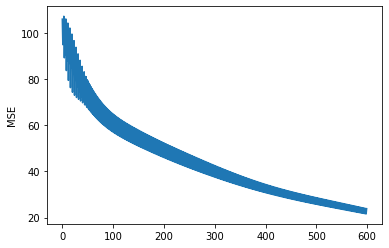

In [202]:
#Affichage graphique
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

In [203]:
### VERIFICATION DE L'APPRENTISSAGE

In [204]:
#Les probabilités de chaque classe 'Mine' ou 'rocher' issues de l'apprentissage sont stockée dans le modèle.
#A l'aide de tf.argmax, on récupére les indexs des probabilités les plus elevées pour chaque observations
#Ex: Si pour une observation nous avons [0.56, 0.89] renverra 1 car la valeur la plus élevée se trouve à l'index 1
#Ex : Si pour une observation nous avons [0.90, 0.34 ]  renverra 0 car la valeur la plus élevée se trouve à l'index 0
classifications = tf.argmax(reseau, 1)

In [205]:
#Dans le tableau des valeurs réelles :
#Les mines sont encodées comme suit [1,0] l'index ayant la plus grande valeur est 0
#Les rochers ont pour valeur [0,1] sl'index ayant la plus grande valeur est 1

In [206]:
#Si la classification est de [0.90, 0.34 ] l'index ayant la plus grande valeur est 0
#Si c'est une mine [1,0] l'index ayant la plus grande valeur est 0
#Si les deux index sont identiques alors on peut affirmer que c'est une bonne classification
formule_calcul_bonnes_classifications = tf.equal(classifications, tf.argmax(tf_valeurs_reelles_Y,1))

In [207]:
#La précision se calcul en faisant la moyenne (tf.mean)
# des bonnes classifications (aprés les avoir converties en décimale tf.cast, tf.float32)
formule_precision = tf.reduce_mean(tf.cast(formule_calcul_bonnes_classifications, tf.float32))

In [208]:
### PRECISION SUR LES DONNEES DE TESTS

In [209]:
nb_classifications = 0;
nb_bonnes_classifications = 0

#On parcours l'ensemble des données de test (text_x)
for i in range(0,test_x.shape[0]):

    #On récupere les informations
    donneesSonar = test_x[i].reshape(1,60)
    classificationAttendue = test_y[i].reshape(1,2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:donneesSonar})

    #On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:donneesSonar, tf_valeurs_reelles_Y:classificationAttendue})


    #On affiche pour observation la classe originale et la classification réalisée
    print(i,"Classe attendue: ", int(session.run(tf_valeurs_reelles_Y[i][1],feed_dict={tf_valeurs_reelles_Y:test_y})), " Classification: ", prediction_run[0] )

    nb_classifications = nb_classifications+1
    if(accuracy_run*100 ==100):
        nb_bonnes_classifications = nb_bonnes_classifications+1

0 Classe attendue:  1  Classification:  1
1 Classe attendue:  0  Classification:  0
2 Classe attendue:  1  Classification:  1
3 Classe attendue:  1  Classification:  1
4 Classe attendue:  0  Classification:  0
5 Classe attendue:  1  Classification:  1
6 Classe attendue:  0  Classification:  0
7 Classe attendue:  1  Classification:  1
8 Classe attendue:  1  Classification:  0
9 Classe attendue:  0  Classification:  0
10 Classe attendue:  0  Classification:  0
11 Classe attendue:  0  Classification:  0
12 Classe attendue:  0  Classification:  0
13 Classe attendue:  1  Classification:  0
14 Classe attendue:  0  Classification:  0
15 Classe attendue:  1  Classification:  1
16 Classe attendue:  1  Classification:  0
17 Classe attendue:  0  Classification:  0
18 Classe attendue:  0  Classification:  0
19 Classe attendue:  0  Classification:  0
20 Classe attendue:  1  Classification:  0
21 Classe attendue:  0  Classification:  0
22 Classe attendue:  1  Classification:  1
23 Classe attendue:  

In [210]:
print("-------------")
print("Précision sur les donnees de tests = "+str((nb_bonnes_classifications/nb_classifications)*100)+"%")

-------------
Précision sur les donnees de tests = 80.95238095238095%


In [211]:
### PRECISION SUR LES DONNEES D'APPRENTISSAGE

In [212]:
nb_classifications = 0;
nb_bonnes_classifications = 0
for i in range(0,train_x.shape[0]):

    # On récupere les informations
    donneesSonar = train_x[i].reshape(1, 60)
    classificationAttendue = train_y[i].reshape(1, 2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X: donneesSonar})

    # On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X: donneesSonar, tf_valeurs_reelles_Y: classificationAttendue})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1

In [213]:
print("Précision sur les donnees d'apprentissage = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")

Précision sur les donnees d'apprentissage = 88.55421686746988%


In [214]:
### PRECISION SUR L'ENSEMBLE DES DONNEES

In [215]:
nb_classifications = 0;
nb_bonnes_classifications = 0

In [216]:
for i in range(0,207):

    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60)})
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60), tf_valeurs_reelles_Y:Y[i].reshape(1,2)})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1

In [217]:
print("Précision sur l'ensemble des données = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")

Précision sur l'ensemble des données = 86.95652173913044%


In [219]:
session.close()